In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import csv
import requests
headers = { 
    'accept': "application/json", 
    'apikey': "6d8eb8463ade29d77a7b42f7211aa691" } 
cities_df = pd.read_csv("./ViolentCrime2017.csv")
cities_df.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants"
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3
4,New Jersey,Woodbridge Township,100950,51,802,0,50.52,0.01,794.45


In [123]:
base_url ="https://search.onboard-apis.com/areaapi/v2.0.0/state/lookup"
res = requests.get(base_url,headers=headers).json()
res
st_data =pd.DataFrame(res['response']['result']['package']['item'])
st_data.rename(columns={'name':'State','geo_key':'St_geo_key'}, inplace=True)
statedata = st_data[['State','St_geo_key','abbreviation']]
city_table =pd.merge(cities_df, statedata, on="State", how="left")
city_table.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6,ST55,WI
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3,ST12,FL
4,New Jersey,Woodbridge Township,100950,51,802,0,50.52,0.01,794.45,ST34,NJ


In [124]:
appended_new = pd.DataFrame([])
for index, row in city_table.iterrows():
    stgc = row['St_geo_key']
    city = row['City']  
    city_url ="https://search.onboard-apis.com/areaapi/v2.0.0/geoid/lookup/?geoId="+stgc+"&GeoType=PL" 
    
    resc = requests.get(city_url,headers=headers).json()
    city_data = pd.DataFrame(resc['response']['result']['package']['item'])
    
    new = city_data.loc[city_data['name'] == city]      
    appended_new = appended_new.append(new)
    
appended_new.head()

,area,area_unit,geo_key,id,name,type
1747,19.3683,sq. mi.,PL4224000,4224000,Erie,PL
601,23.6186,sq. mi.,PL5357745,5357745,Renton,PL
752,27.8249,sq. mi.,PL5539225,5539225,Kenosha,PL
867,35.6799,sq. mi.,PL1216475,1216475,Davie,PL
671,41.9473,sq. mi.,PL1871000,1871000,South Bend,PL


In [12]:
city_table1 =pd.merge(city_table, appended_new, left_on=['City'], right_on=['name'])
city_table1.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation,area,area_unit,geo_key,id,name,type
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,19.3683,sq. mi.,PL4224000,4224000,Erie,PL
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA,23.6186,sq. mi.,PL5357745,5357745,Renton,PL
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6,ST55,WI,27.8249,sq. mi.,PL5539225,5539225,Kenosha,PL
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3,ST12,FL,35.6799,sq. mi.,PL1216475,1216475,Davie,PL
4,Indiana,South Bend,101240,465,2201,0,459.3,0.02,2174.04,ST18,IN,41.9473,sq. mi.,PL1871000,1871000,South Bend,PL


In [13]:
appended_main = pd.DataFrame([])

for index, row in city_table1.iterrows():
    cgc = row['geo_key']
  
    base_url="https://search.onboard-apis.com/communityapi/v2.0.0/area/full?AreaId="+cgc
    
    resct = requests.get( base_url,headers=headers).json()
    city_data2 = pd.DataFrame(resct['response']['result']['package']['item'])
    appended_main = appended_main.append(city_data2)
 
    #appended_new = appended_new.append(new)
    
# cocrmcyasst : Assault Risk (County)
# cocrmcytotc : Total Crime Risk (County)
crime = appended_main[['name','latitude','geo_key','longitude','cocrmcyasst','cocrmcytotc']]
crime.head()

,name,latitude,geo_key,longitude,cocrmcyasst,cocrmcytotc
0,Erie,42.115943,PL4224000,-80.073991,79,83
0,Renton,47.478434,PL5357745,-122.183594,59,127
0,Kenosha,42.584065,PL5539225,-87.852219,39,70
0,Davie,26.080792,PL1216475,-80.280488,103,112
0,South Bend,41.670857,PL1871000,-86.253333,41,119


In [70]:
crime1 = crime.reset_index()
crime1 = crime1.drop(columns=['index'])
# crime1 = crime1.iloc[0:9,:]
crime1.shape

(267, 6)

In [71]:
schools = pd.DataFrame(columns=['city_name','latitude','longitude','geo_key','cocrmcyasst','cocrmcytotc','school_id'])
schoolCount = 0
for index, row in crime1.iterrows():
    print(f"Processing City Name: {row['name']}")
    lat = row['latitude']
    lng = row['longitude']  
    sch_url="https://search.onboard-apis.com/propertyapi/v1.0.0/school/snapshot?latitude="+lat+"&longitude="+lng+"&radius=50&filetypetext=public"
    try:
        response = requests.get(sch_url,headers=headers)
        if response.status_code == requests.codes.ok:
            resch = response.json()
            for a_school in resch['school']:
                schools.loc[schoolCount] = [row['name'],row['latitude'], row['longitude'],row['geo_key'],row['cocrmcyasst'],row['cocrmcytotc'],a_school['Identifier']['OBInstID'] ]
                schoolCount += 1
        else:
            print("School not found. Skipping...")
    except:         
        print("Unknown exception...")
        pass

schools.head()

Processing City Name: Erie
Processing City Name: Renton
Processing City Name: Kenosha
Processing City Name: Davie
Processing City Name: South Bend
Processing City Name: Las Cruces
Processing City Name: Tyler
Processing City Name: Lakeland
Processing City Name: Rialto
Processing City Name: Clovis
Processing City Name: Sandy Springs
Unknown exception...
Processing City Name: El Cajon
Processing City Name: San Mateo
Processing City Name: Santa Maria
Processing City Name: Lewisville
Processing City Name: West Palm Beach
Processing City Name: Green Bay
Processing City Name: Wichita Falls
Processing City Name: College Station
Processing City Name: Burbank
Processing City Name: Burbank
Processing City Name: Broken Arrow
Processing City Name: Palm Bay
Processing City Name: Pearland
Processing City Name: Daly City
Processing City Name: Norwalk
Processing City Name: Everett
Processing City Name: Pompano Beach
Processing City Name: Pueblo
Processing City Name: West Covina
Processing City Name: Wa

Processing City Name: Austin
Processing City Name: San Jose
Processing City Name: Dallas
Processing City Name: San Diego
Processing City Name: San Antonio
Processing City Name: Philadelphia
Processing City Name: Houston
Processing City Name: Chicago
Processing City Name: Los Angeles
Processing City Name: New York
Processing City Name: Plano
Processing City Name: Plano
Processing City Name: Plano
Processing City Name: Plano
Processing City Name: Plano
Processing City Name: Plano


,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id
0,Erie,42.115943,-80.073991,PL4224000,79,83,04791835
1,Erie,42.115943,-80.073991,PL4224000,79,83,05286986
2,Erie,42.115943,-80.073991,PL4224000,79,83,02107991
3,Erie,42.115943,-80.073991,PL4224000,79,83,00909157
4,Erie,42.115943,-80.073991,PL4224000,79,83,00909016


In [73]:
schools.shape

(2560, 9)

In [72]:
for index, row in schools.iterrows():
    city_name = row['city_name']
    school_id = row['school_id']         
    sch_url="https://search.onboard-apis.com/propertyapi/v1.0.0/school/detail?id="+school_id
    try:
        response = requests.get(sch_url,headers=headers)
        if response.status_code == requests.codes.ok:
            resch = response.json()
            #Studentteacher is School enrollment student teacher
            schools.loc[index,'studentteacherratio'] = resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolEnrollment']['Studentteacher']
            schools.loc[index,'highschool'] = resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolSummary']['High']
#             print(resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolEnrollment']['Studentteacher'])
        else:
            print("Data not found. Skipping...")
    except:         
        print(f"Unknown exception for city {city_name} school {school_id}...")
        pass
schools.head()

Unknown exception for city Erie school 00909030...
Unknown exception for city Palm Bay school 03398985...
Unknown exception for city Richmond school 01088328...
Unknown exception for city Richmond school 5700110131...
Unknown exception for city Antioch school 00053409...
Unknown exception for city Richardson school 01011789...
Unknown exception for city Inglewood school 5700071696...
Unknown exception for city Inglewood school 5700052709...
Unknown exception for city Rochester school 5700054518...
Unknown exception for city Fairfield school 5700097830...
Unknown exception for city Columbia school 00960565...
Unknown exception for city Victorville school 10756227...
Unknown exception for city Coral Springs school 01339983...
Unknown exception for city Visalia school 00138982...
Unknown exception for city Hampton school 01085376...
Unknown exception for city Miramar school 04815194...
Unknown exception for city Killeen school 00996605...
Unknown exception for city McAllen school 02043345

Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skip

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio,highschool
0,Erie,42.115943,-80.073991,PL4224000,79,83,04791835,17,Y
1,Erie,42.115943,-80.073991,PL4224000,79,83,05286986,12,Y
2,Erie,42.115943,-80.073991,PL4224000,79,83,02107991,11,None
3,Erie,42.115943,-80.073991,PL4224000,79,83,00909157,11,None
4,Erie,42.115943,-80.073991,PL4224000,79,83,00909016,14,None


In [75]:
schools.shape

(2560, 9)

In [76]:
#remove data when student teacher ratio is not reported
schools_data = schools
# schools_data2 = schools_data.loc[schools_data['studentteacherratio'] != 'Not Reported', :] 
schools_data2 = schools_data.loc[(schools_data['studentteacherratio'] != 'Not Reported') & (schools_data['highschool'] == 'Y'), :] 
schools_data2.head()

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio,highschool
0,Erie,42.115943,-80.073991,PL4224000,79,83,04791835,17,Y
1,Erie,42.115943,-80.073991,PL4224000,79,83,05286986,12,Y
6,Erie,42.115943,-80.073991,PL4224000,79,83,00909121,13,Y
13,Renton,47.478434,-122.183594,PL5357745,59,127,01101841,21,Y
39,Davie,26.080792,-80.280488,PL1216475,103,112,00183523,20,Y


In [77]:
schools_data2.shape

(461, 9)

In [78]:
#convert student teacher ratio column data to integer
schools_data2['studentteacherratio'] = schools_data2['studentteacherratio'].astype(str).astype(int)
schools_data2['cocrmcyasst'] = schools_data2['cocrmcyasst'].astype(str).astype(int)
schools_data2['cocrmcytotc'] = schools_data2['cocrmcytotc'].astype(str).astype(int)

schools_data2.head()

C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio,highschool
0,Erie,42.115943,-80.073991,PL4224000,79,83,04791835,17,Y
1,Erie,42.115943,-80.073991,PL4224000,79,83,05286986,12,Y
6,Erie,42.115943,-80.073991,PL4224000,79,83,00909121,13,Y
13,Renton,47.478434,-122.183594,PL5357745,59,127,01101841,21,Y
39,Davie,26.080792,-80.280488,PL1216475,103,112,00183523,20,Y


In [79]:
# calculate average student teacher ratio for each city
schools_city = schools_data2.groupby(['city_name'])['cocrmcyasst','cocrmcytotc','studentteacherratio'].mean()
schools_city.head()

,cocrmcyasst,cocrmcytotc,studentteacherratio
city_name,,,
Abilene,105.0,101.0,14.00
Akron,54.0,85.0,20.75
Alexandria,68.0,106.0,14.50
Allentown,65.0,78.0,13.50
Amarillo,155.0,137.0,23.50


In [80]:
schools_city.shape

(190, 3)

In [112]:
#get 
base_url = 'https://odn.data.socrata.com/resource/8apn-rhyh.json?&variable=percent_high_school_graduate_or_higher&type=place&year=2017&$limit=1500000'
headers = {
    'apikey': "y7qEzTXmdu4mI7zRlsejOJgpF" }

response = requests.get(base_url, headers=headers).json()
test=pd.DataFrame(response)
states = [row.split(", ")[1] for row in test.name]
cities = [row.split(", ")[0] for row in test.name]
test["city_name"] = cities
test["State"] = states
test.replace(" city","",regex=True, inplace=True)
# new = test.loc[(test['State'] == 'Michigan')]
# new2 = new.loc[(new['name']=='Detroit city, Michigan')]
gradrate=test.replace(" CDP","",regex=True, inplace=False)

gradrate.head()

,id,name,type,value,variable,year,city_name,State
0,1600000US2642460,"Keego Harbor, Michigan",place,91.7,percent_high_school_graduate_or_higher,2017,Keego Harbor,Michigan
1,1600000US4873057,"Timberwood Park, Texas",place,93.9,percent_high_school_graduate_or_higher,2017,Timberwood Park,Texas
2,1600000US1818550,"Dover Hill, Indiana",place,100,percent_high_school_graduate_or_higher,2017,Dover Hill,Indiana
3,1600000US5464516,"Poca town, West Virginia",place,89.5,percent_high_school_graduate_or_higher,2017,Poca town,West Virginia
4,1600000US2060825,"Roeland Park, Kansas",place,96.8,percent_high_school_graduate_or_higher,2017,Roeland Park,Kansas


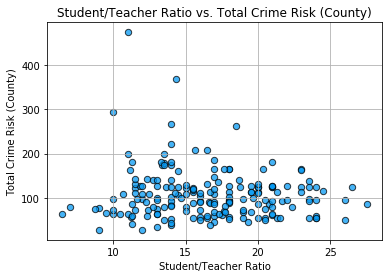

In [82]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
#cocrmcytotc
plt.scatter(schools_city['studentteacherratio'], schools_city['cocrmcytotc'], marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County)")
plt.show()

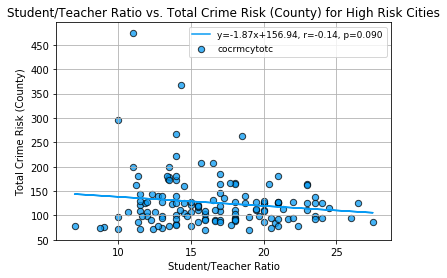

In [110]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
#cocrmcytotc
# only high total crime risk cities
schools_city_totalc_high = schools_city.loc[schools_city['cocrmcytotc']>=70,:]
x = schools_city_totalc_high['studentteacherratio']
y = schools_city_totalc_high['cocrmcytotc']



plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County) for High Risk Cities")

from scipy import stats
#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))
#end

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()

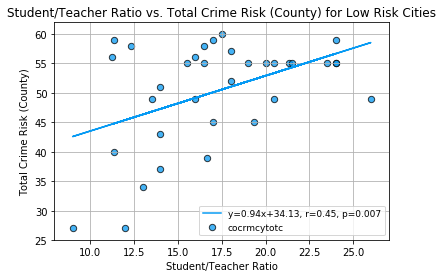

In [105]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
#cocrmcytotc
# only low total crime risk cities
schools_city_totalc_high = schools_city.loc[schools_city['cocrmcytotc']<=60,:]
x = schools_city_totalc_high['studentteacherratio']
y = schools_city_totalc_high['cocrmcytotc']



plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County) for Low Risk Cities")

from scipy import stats
#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))
#end

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()

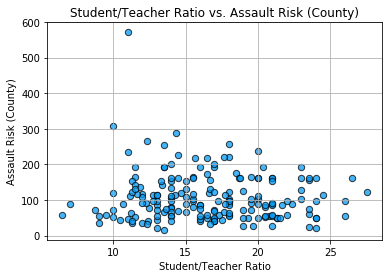

In [83]:
# scatter plot for Student/Teacher Ratio vs. Assault Risk (County)
#cocrmcyasst
plt.scatter(schools_city['studentteacherratio'], schools_city['cocrmcyasst'], marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Assault Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Assault Risk (County)")
plt.show()